<a href="https://colab.research.google.com/github/Lojain12/Flight_Price/blob/main/Flight_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [947]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import os
import tarfile
import urllib

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [948]:
data = pd.read_csv("Flight_price.csv")
data.head()

,number,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,lead_reservation,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [949]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   number            300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  lead_reservation  300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [950]:
data.describe()

,number,duration,lead_reservation,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [951]:
data.shape

(300153, 12)

In [952]:
data.isnull().sum()

number              0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
lead_reservation    0
price               0
dtype: int64

In [953]:
#check duplicates
data.duplicated().sum()

0

In [954]:
data.nunique()

number              300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
lead_reservation        49
price                12157
dtype: int64

In [955]:
data.drop(["number"], axis=1, inplace=True)

In [956]:
data.shape

(300153, 11)

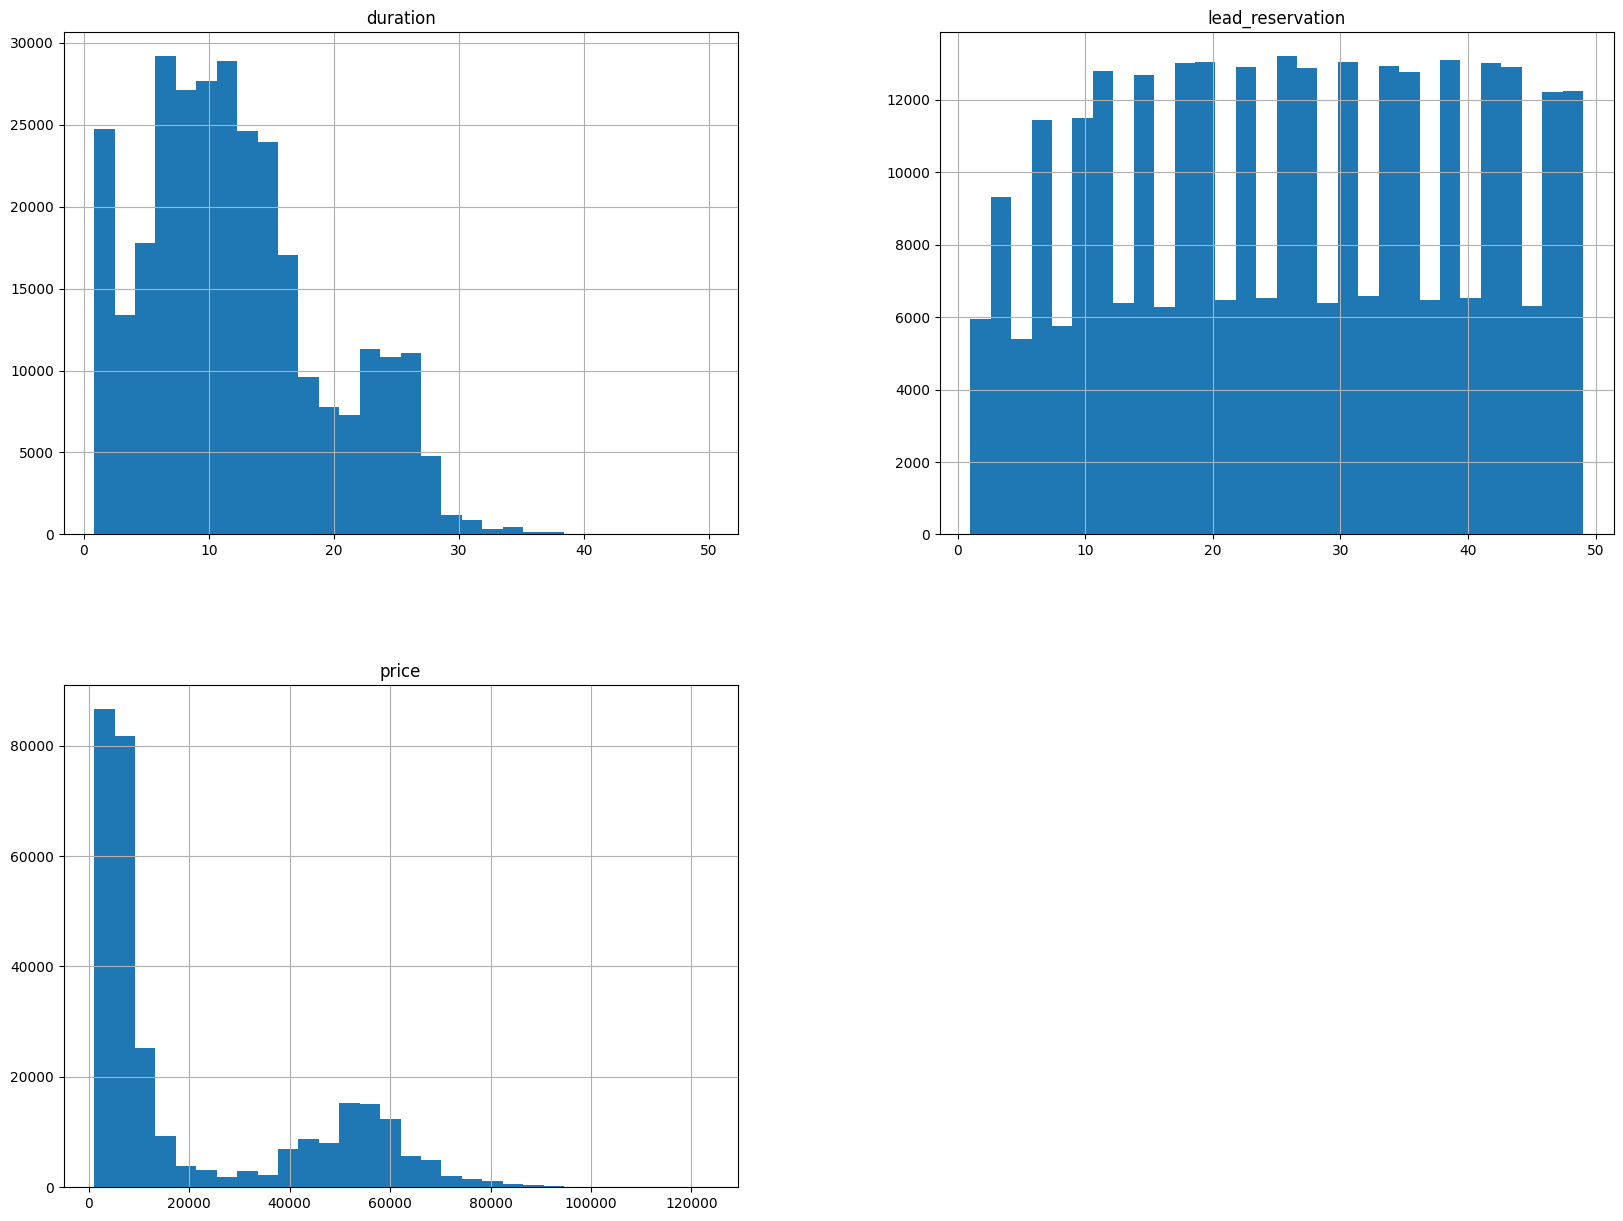

In [957]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=30, figsize=(20,15))
plt.show()

In [958]:
data.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
lead_reservation    0
price               0
dtype: int64

In [959]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print("Training data size: ",len(train_set))
print("Testing data size: ",len(test_set))

Training data size:  240122
Testing data size:  60031


In [960]:
class_mapping = {'Business':0, 'Economy':1}
data['class'] = data['class'].map(class_mapping)
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,lead_reservation,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,1,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,1,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,1,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,1,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,1,2.33,1,5955


<Axes: >

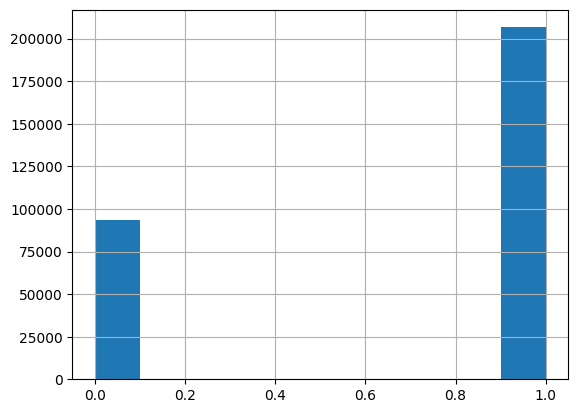

In [961]:
data["class1"] = pd.cut(data["class"], bins = [-1,0,1], labels = [0,1])
data["class1"].hist()

In [962]:
#2: two or more stops
Stops_mapping = {'zero':0, 'one':1, 'two_or_more':2}
data['stops'] = data['stops'].map(Stops_mapping)
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,lead_reservation,price,class1
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,1,2.17,1,5953,1
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,1,2.33,1,5953,1
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,1,2.17,1,5956,1
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,1,2.25,1,5955,1
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,1,2.33,1,5955,1


In [963]:

Arrival_mapping = {'Early_Morning':0, 'Morning':1, 'Afternoon':2, 'Evening':3, 'Night':4, 'Late_Night':5}
data['arrival_time'] = data['arrival_time'].map(Arrival_mapping)
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,lead_reservation,price,class1
0,SpiceJet,SG-8709,Delhi,Evening,0,4,Mumbai,1,2.17,1,5953,1
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,1,Mumbai,1,2.33,1,5953,1
2,AirAsia,I5-764,Delhi,Early_Morning,0,0,Mumbai,1,2.17,1,5956,1
3,Vistara,UK-995,Delhi,Morning,0,2,Mumbai,1,2.25,1,5955,1
4,Vistara,UK-963,Delhi,Morning,0,1,Mumbai,1,2.33,1,5955,1


In [964]:

departure_mapping = {'Early_Morning':0, 'Morning':1, 'Afternoon':2, 'Evening':3, 'Night':4, 'Late_Night':5}
data['departure_time'] = data['departure_time'].map(departure_mapping)
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,lead_reservation,price,class1
0,SpiceJet,SG-8709,Delhi,3,0,4,Mumbai,1,2.17,1,5953,1
1,SpiceJet,SG-8157,Delhi,0,0,1,Mumbai,1,2.33,1,5953,1
2,AirAsia,I5-764,Delhi,0,0,0,Mumbai,1,2.17,1,5956,1
3,Vistara,UK-995,Delhi,1,0,2,Mumbai,1,2.25,1,5955,1
4,Vistara,UK-963,Delhi,1,0,1,Mumbai,1,2.33,1,5955,1


In [965]:
from pandas.core.describe import DataFrameDescriber
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1 ,test_size=0.2,random_state=42)
for train_index,test_index in split.split(data,data["class1"]):
    strat_train_set=data.loc[train_index]
    strat_test_set =data.loc[test_index]

In [966]:
strat_test_set["class1"].value_counts()/ len(strat_test_set)

1    0.688528
0    0.311472
Name: class1, dtype: float64

In [967]:
strat_train_set["class1"].value_counts()/ len(strat_train_set)

1    0.688537
0    0.311463
Name: class1, dtype: float64

In [968]:
data["class1"].value_counts()/ len(data)

1    0.688536
0    0.311464
Name: class1, dtype: float64

In [969]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240122 entries, 249451 to 118046
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   airline           240122 non-null  object  
 1   flight            240122 non-null  object  
 2   source_city       240122 non-null  object  
 3   departure_time    240122 non-null  int64   
 4   stops             240122 non-null  int64   
 5   arrival_time      240122 non-null  int64   
 6   destination_city  240122 non-null  object  
 7   class             240122 non-null  int64   
 8   duration          240122 non-null  float64 
 9   lead_reservation  240122 non-null  int64   
 10  price             240122 non-null  int64   
 11  class1            240122 non-null  category
dtypes: category(1), float64(1), int64(6), object(4)
memory usage: 22.2+ MB


In [970]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("class1", axis=1, inplace=True)

In [971]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240122 entries, 249451 to 118046
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           240122 non-null  object 
 1   flight            240122 non-null  object 
 2   source_city       240122 non-null  object 
 3   departure_time    240122 non-null  int64  
 4   stops             240122 non-null  int64  
 5   arrival_time      240122 non-null  int64  
 6   destination_city  240122 non-null  object 
 7   class             240122 non-null  int64  
 8   duration          240122 non-null  float64
 9   lead_reservation  240122 non-null  int64  
 10  price             240122 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 22.0+ MB


In [972]:
data['price'] = data['price'].astype(float)

In [973]:
data = strat_train_set.copy()
corr_matrix= data.corr()
corr_matrix["price"].sort_values(ascending=False)

price               1.000000
duration            0.205539
stops               0.118630
departure_time      0.021751
arrival_time       -0.000865
lead_reservation   -0.091280
class              -0.937985
Name: price, dtype: float64

In [974]:
corr_matrix

,departure_time,stops,arrival_time,class,duration,lead_reservation,price
departure_time,1.000000,-0.068384,-0.080628,-0.032044,0.132420,-0.000524,0.021751
stops,-0.068384,1.000000,0.047459,-0.000511,0.465972,-0.006459,0.118630
arrival_time,-0.080628,0.047459,1.000000,0.022422,-0.123922,-0.000898,-0.000865
class,-0.032044,-0.000511,0.022422,1.000000,-0.140246,0.012500,-0.937985
duration,0.132420,0.465972,-0.123922,-0.140246,1.000000,-0.038561,0.205539
lead_reservation,-0.000524,-0.006459,-0.000898,0.012500,-0.038561,1.000000,-0.091280
price,0.021751,0.118630,-0.000865,-0.937985,0.205539,-0.091280,1.000000


array([[<Axes: xlabel='duration', ylabel='duration'>,
        <Axes: xlabel='class', ylabel='duration'>,
        <Axes: xlabel='lead_reservation', ylabel='duration'>,
        <Axes: xlabel='price', ylabel='duration'>],
       [<Axes: xlabel='duration', ylabel='class'>,
        <Axes: xlabel='class', ylabel='class'>,
        <Axes: xlabel='lead_reservation', ylabel='class'>,
        <Axes: xlabel='price', ylabel='class'>],
       [<Axes: xlabel='duration', ylabel='lead_reservation'>,
        <Axes: xlabel='class', ylabel='lead_reservation'>,
        <Axes: xlabel='lead_reservation', ylabel='lead_reservation'>,
        <Axes: xlabel='price', ylabel='lead_reservation'>],
       [<Axes: xlabel='duration', ylabel='price'>,
        <Axes: xlabel='class', ylabel='price'>,
        <Axes: xlabel='lead_reservation', ylabel='price'>,
        <Axes: xlabel='price', ylabel='price'>]], dtype=object)

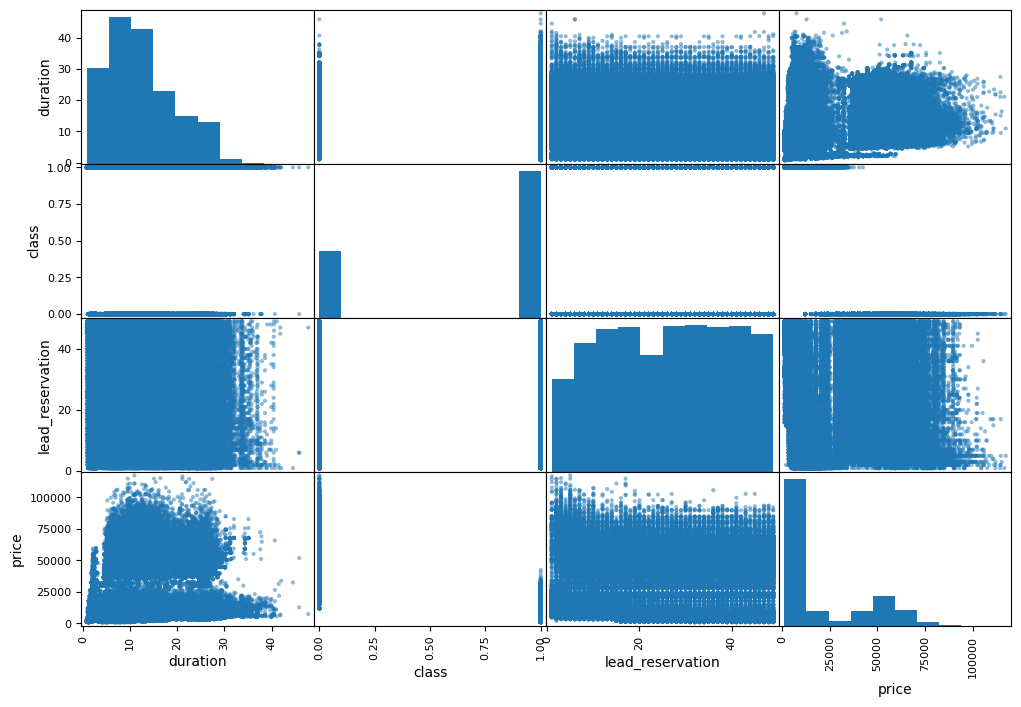

In [975]:
from pandas.plotting import scatter_matrix
attributes=["duration","class","lead_reservation","price"]
scatter_matrix(data[attributes], figsize=(12,8))

In [976]:
#2: Two or more
Stops_mapping = {'zero':0, 'one':1, 'two_or_more':2}
data['stops'] = data['stops'].map(Stops_mapping)
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,lead_reservation,price
249451,Air_India,AI-804,Bangalore,0,NaN,4,Mumbai,0,16.00,11,54684
110868,Air_India,AI-503,Bangalore,3,NaN,4,Hyderabad,1,6.25,12,13054
168963,GO_FIRST,G8-426,Hyderabad,4,NaN,1,Bangalore,1,10.33,34,6256
149799,Indigo,6E-534,Kolkata,3,NaN,4,Chennai,1,5.33,21,5280
83543,Vistara,UK-863,Mumbai,1,NaN,4,Chennai,1,11.17,45,8130


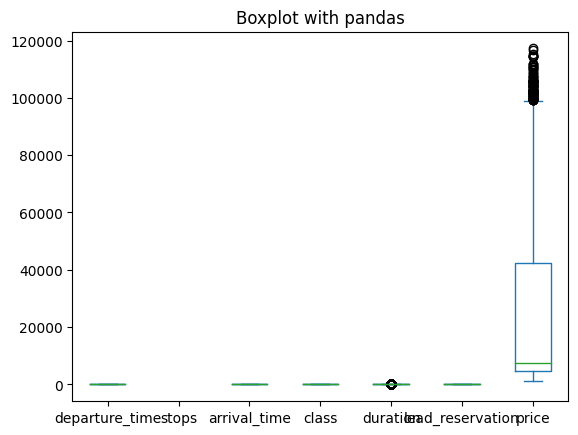

In [977]:
data.plot.box(title='Boxplot with pandas');


In [978]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240122 entries, 249451 to 118046
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           240122 non-null  object 
 1   flight            240122 non-null  object 
 2   source_city       240122 non-null  object 
 3   departure_time    240122 non-null  int64  
 4   stops             0 non-null       float64
 5   arrival_time      240122 non-null  int64  
 6   destination_city  240122 non-null  object 
 7   class             240122 non-null  int64  
 8   duration          240122 non-null  float64
 9   lead_reservation  240122 non-null  int64  
 10  price             240122 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 22.0+ MB


<Axes: >

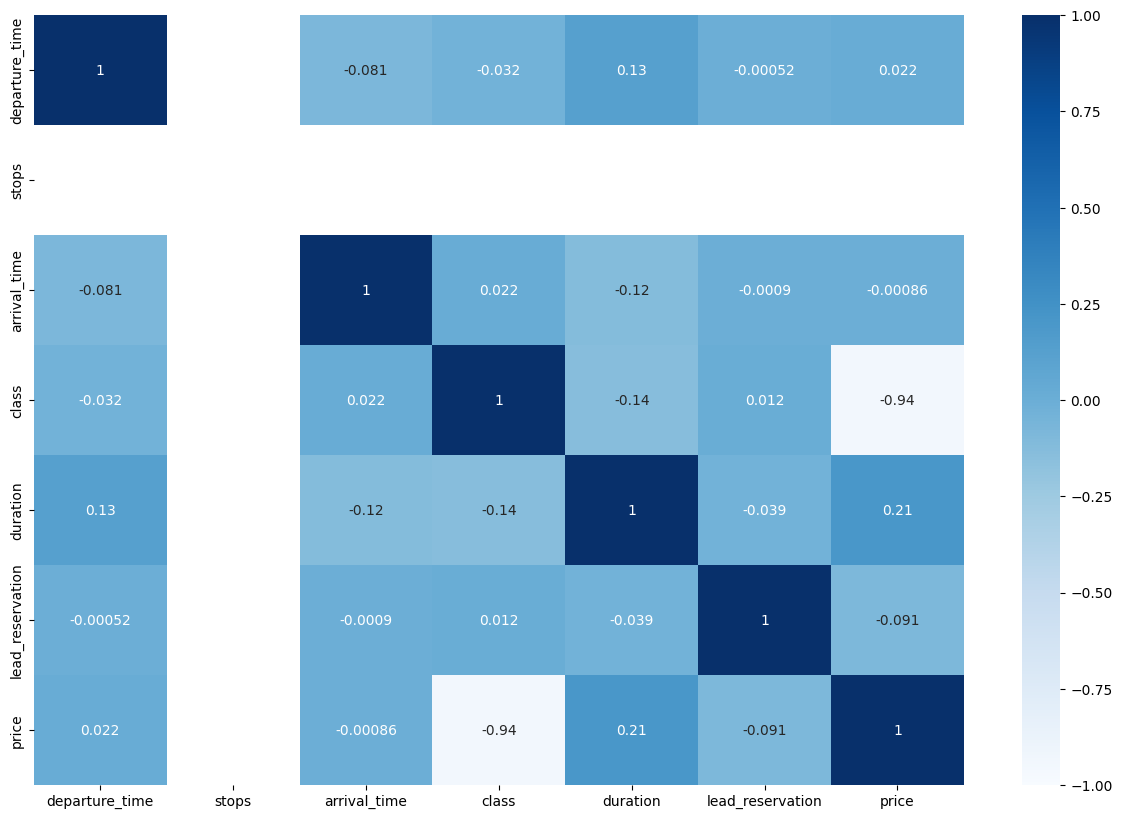

In [979]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),cmap='Blues', annot=True, vmin=-1, vmax=1)
##plt.savefig('aqar_corr.png', transparent=True, bbox_inches='tight', c = 'w');

<Axes: xlabel='arrival_time'>

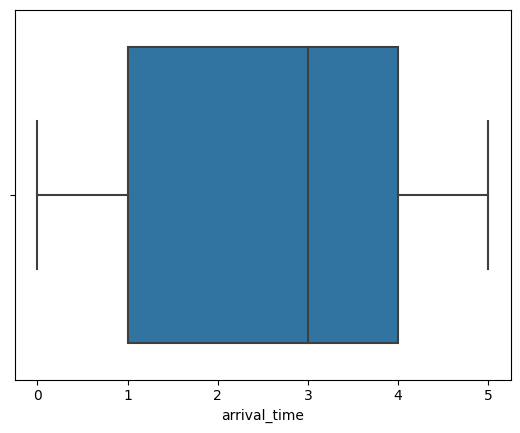

In [980]:
sns.boxplot(x=data["arrival_time"])


<Axes: xlabel='departure_time'>

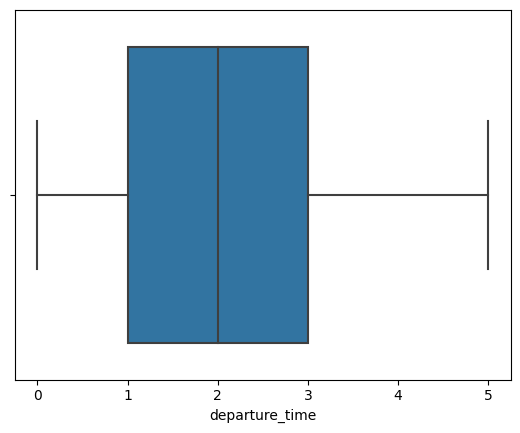

In [981]:
sns.boxplot(x=data["departure_time"])

<Axes: xlabel='price'>

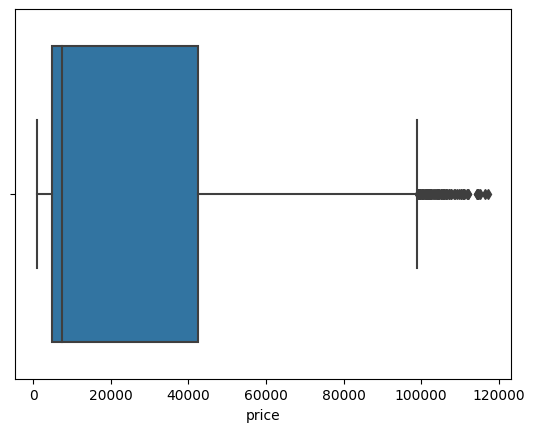

In [982]:
sns.boxplot(x=data["price"])

In [983]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240122 entries, 249451 to 118046
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           240122 non-null  object 
 1   flight            240122 non-null  object 
 2   source_city       240122 non-null  object 
 3   departure_time    240122 non-null  int64  
 4   stops             0 non-null       float64
 5   arrival_time      240122 non-null  int64  
 6   destination_city  240122 non-null  object 
 7   class             240122 non-null  int64  
 8   duration          240122 non-null  float64
 9   lead_reservation  240122 non-null  int64  
 10  price             240122 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 22.0+ MB
